## Pew 2014

In [1]:
import pyreadstat
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
# Taken from https://gist.github.com/rogerallen/1583593
us_state_abbrev = {
    'Alabama': 'AL',
    'Alaska': 'AK',
    'Arizona': 'AZ',
    'Arkansas': 'AR',
    'California': 'CA',
    'Colorado': 'CO',
    'Connecticut': 'CT',
    'Delaware': 'DE',
    'District of Columbia': 'DC',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Hawaii': 'HI',
    'Idaho': 'ID',
    'Illinois': 'IL',
    'Indiana': 'IN',
    'Iowa': 'IA',
    'Kansas': 'KS',
    'Kentucky': 'KY',
    'Louisiana': 'LA',
    'Maine': 'ME',
    'Maryland': 'MD',
    'Massachusetts': 'MA',
    'Michigan': 'MI',
    'Minnesota': 'MN',
    'Mississippi': 'MS',
    'Missouri': 'MO',
    'Montana': 'MT',
    'Nebraska': 'NE',
    'Nevada': 'NV',
    'New Hampshire': 'NH',
    'New Jersey': 'NJ',
    'New Mexico': 'NM',
    'New York': 'NY',
    'North Carolina': 'NC',
    'North Dakota': 'ND',
    'Northern Mariana Islands':'MP',
    'Ohio': 'OH',
    'Oklahoma': 'OK',
    'Oregon': 'OR',
    'Palau': 'PW',
    'Pennsylvania': 'PA',
    'Puerto Rico': 'PR',
    'Rhode Island': 'RI',
    'South Carolina': 'SC',
    'South Dakota': 'SD',
    'Tennessee': 'TN',
    'Texas': 'TX',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virgin Islands': 'VI',
    'Virginia': 'VA',
    'Washington': 'WA',
    'West Virginia': 'WV',
    'Wisconsin': 'WI',
    'Wyoming': 'WY',
}

# thank you to @kinghelix and @trevormarburger for this idea
abbrev_us_state = dict(map(reversed, us_state_abbrev.items()))

In [3]:
survey_file = "../../data/polarization/raw_data/Pew/Polarization 2014/Polarization 2014 public.sav"
survey_df, survey_meta = pyreadstat.read_sav(survey_file)

In [4]:
survey_df

,respid,sample,int_date,fcall,attempt,refusal,lang,cregion,state,density,...,racethn,intuser,q148correct,llweight,cellweight,ideoConsist,ideoConsistREC,bys,typogroups,weight
0,2.0,1.0,140123.0,140123.0,1.0,0.0,1.0,2.0,26.0,1.0,...,1.0,1.0,1.0,0.794975,NaN,2.0,3.0,0.0,4.0,0.559442
1,5.0,1.0,140123.0,140123.0,1.0,0.0,1.0,2.0,18.0,1.0,...,1.0,1.0,9.0,0.910238,NaN,-2.0,3.0,0.0,4.0,0.893222
2,6.0,1.0,140128.0,140123.0,5.0,0.0,1.0,1.0,42.0,2.0,...,1.0,1.0,NaN,0.566814,NaN,4.0,4.0,0.0,5.0,0.643331
3,7.0,1.0,140123.0,140123.0,1.0,0.0,1.0,3.0,51.0,5.0,...,1.0,1.0,9.0,0.481135,NaN,-7.0,1.0,0.0,1.0,0.688419
4,9.0,1.0,140123.0,140123.0,1.0,0.0,1.0,2.0,26.0,1.0,...,1.0,1.0,9.0,0.709349,NaN,3.0,4.0,0.0,6.0,0.564785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10008,503641.0,2.0,140316.0,140316.0,7.0,0.0,1.0,4.0,6.0,4.0,...,1.0,1.0,2.0,NaN,1.954333,6.0,4.0,0.0,7.0,0.781868
10009,503642.0,2.0,140316.0,140316.0,8.0,0.0,2.0,4.0,6.0,5.0,...,3.0,0.0,NaN,NaN,1.830224,-2.0,3.0,1.0,8.0,1.946245
10010,503643.0,2.0,140316.0,140316.0,7.0,0.0,1.0,4.0,6.0,5.0,...,3.0,1.0,NaN,NaN,0.863679,-8.0,1.0,1.0,8.0,1.514870
10011,503644.0,2.0,140316.0,140316.0,7.0,0.0,1.0,3.0,47.0,3.0,...,1.0,1.0,NaN,NaN,0.924244,2.0,3.0,0.0,6.0,1.382595


In [5]:
slabel_to_state = survey_meta.value_labels["labels4"]
plabel_to_party = survey_meta.value_labels["labels159"]

slabel_to_ideo = survey_df[["sstate", "party", "ideoConsist"]]
slabel_to_ideo.loc[:, "state"] = slabel_to_ideo["sstate"].map(slabel_to_state)
slabel_to_ideo.loc[:, "party"] = slabel_to_ideo["party"].map(plabel_to_party)
ideoConsist = slabel_to_ideo[["state", "party", "ideoConsist"]]

def consistency_measure(x):
    return x[:, "Republican"] - x[:, "Democrat"]

ideoConsist = ideoConsist.groupby(["state", "party"])["ideoConsist"].median()
ideoConsist = ideoConsist.groupby("state").apply(consistency_measure)

/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/miniconda3/envs/py3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


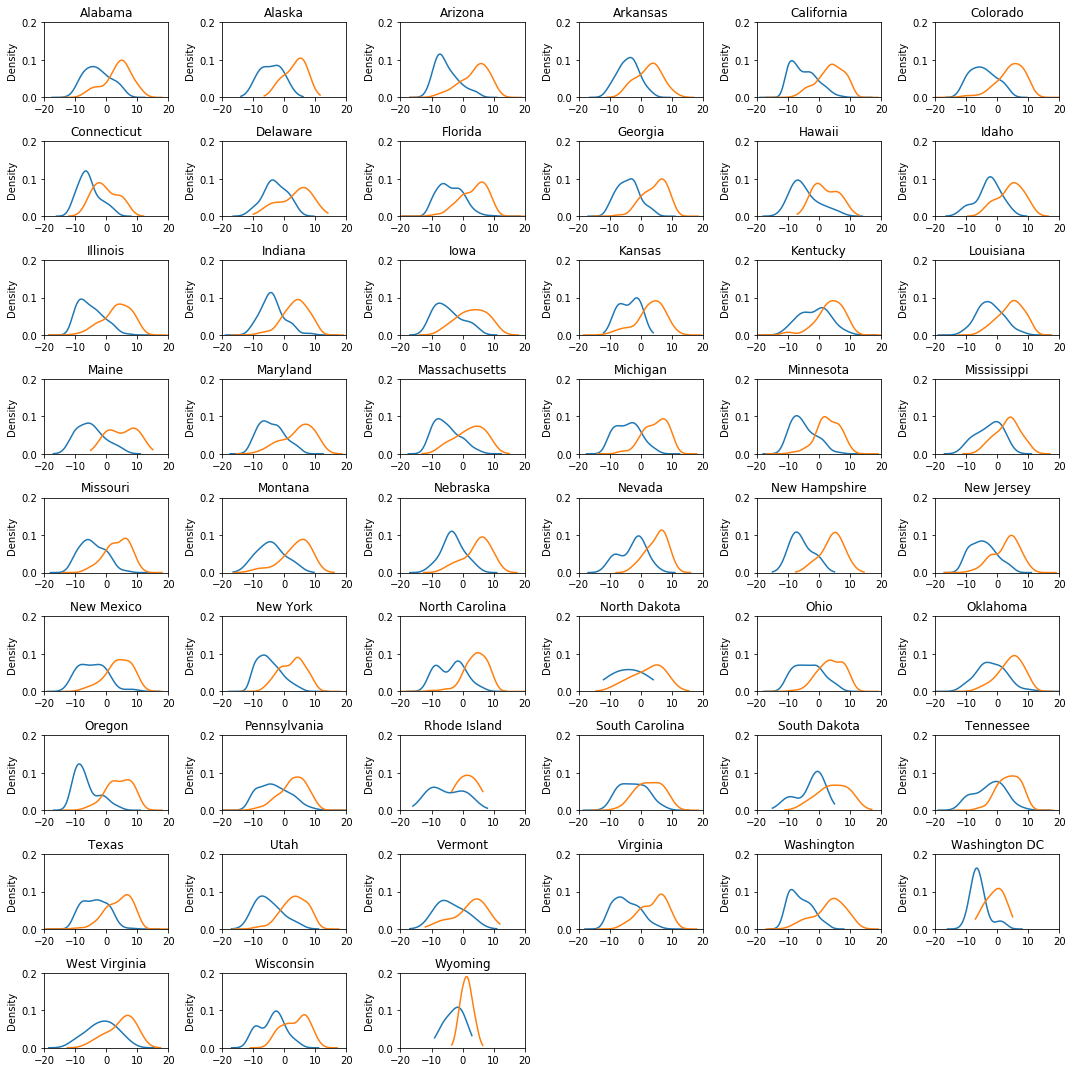

In [6]:
state_groups = slabel_to_ideo.groupby("state")

plt.figure(figsize=(15, 15))

for i, (state_name, ideo_con) in enumerate(state_groups):
    # create subplot axes in a 3x3 grid
    ax = plt.subplot(9, 6, i + 1) # nrows, ncols, axes position
    # plot the continent on these axes
    d = ideo_con.loc[ideo_con['party'] == "Democrat"]["ideoConsist"]
    r = ideo_con.loc[ideo_con['party'] == "Republican"]["ideoConsist"]
    
    pd.DataFrame({"Dem": d, "Rep": r}).plot(kind='density', xlim = (-20, 20), ylim = (0, 0.2), ax=ax)
    # set the title
    ax.set_title(state_name)
    ax.get_legend().remove()

plt.tight_layout()
plt.show()

In [7]:
state_to_ideo_var_file = "../../data/polarization/processed_data/state_mass_pol.csv"
with open(state_to_ideo_var_file, 'w') as f:
    f.write("{}, {}".format("state", "ideoConsist"))
    f.write("\n")
    for s in ideoConsist.items():
        # a little hacky with the multiindex
        dist = s[1]
        state = s[0][0]
        f.write("{}, {}".format(state, dist))
        f.write("\n")

## Shor & McCarty 2014

In [8]:
shor_mcarty_file = "../../data/polarization/raw_data/Shor & McCarty/shor_mc.sta"
shor_mcarty_all_df = pd.read_stata(shor_mcarty_file)
shor_mcarty_df = shor_mcarty_all_df.loc[shor_mcarty_all_df['year'] == 2014][["st", "h_distance", "s_distance"]]

In [9]:
# select all states with elections
state_to_dists = {}

for i, (state_name, h_dist, s_dist) in shor_mcarty_df.iterrows():
    state_name = abbrev_us_state[state_name]
    if state_name in us_state_abbrev.keys():
        state_to_dists[state_name] = (h_dist, s_dist)

In [10]:
state_to_dist_file = "../../data/polarization/processed_data/state_elite_pol.csv"
with open(state_to_dist_file, 'w') as f:
    f.write("{}, {}, {}".format("state", "h_dist", "s_dist"))
    f.write("\n")
    for s, (h_dist, s_dist) in state_to_dists.items():
        f.write("{}, {}, {}".format(s, h_dist, s_dist))
        f.write("\n")